In [1]:
from pymongo import MongoClient
import pymongo

myclient = pymongo.MongoClient('mongodb://localhost:27017/')
dblist = myclient.list_database_names()
mydb = myclient["Summary_Hashtag_Details_Week"]

In [2]:
def func_divide_week(listTemp, n):
    for i in range(0, len(listTemp), n):
        yield listTemp[i:i + n]

In [3]:
import pandas as pd
import os
import random
Start_date = '2020-01-22'
End_date = '2021-03-30'
datelist = pd.date_range(Start_date, End_date).tolist()
temp = func_divide_week(datelist, 7)
first = "#covid19"
second = "#coronavirus"
third = "#lockdown"
forth = "#stayhome"
fifth = "#corona"
list_Hashtag_first = []
list_Hashtag_second= []
list_Hashtag_third= []
list_Hashtag_forth= []
list_Hashtag_fifth= []
for week in temp:
    collection_name = "distribution_like-"+str(week[0])[0:4]+"_"+str(week[0])[5:7]+"_"+str(week[0])[8:10]+"_Week_Hashtag_Details"
    mycol = mydb[collection_name]
    week_num = mycol.find({"_id":first})
    if(week_num.count()==0):
        list_Hashtag_first.append(int(0))
    if(week_num.count()!=0):
        for x in week_num:
            list_Hashtag_first.append(x['likenum'])
    week_num = mycol.find({"_id":second})
    if(week_num.count()==0):
        list_Hashtag_second.append(int(0))
    if(week_num.count()!=0):
        for x in week_num:
            list_Hashtag_second.append(x['likenum'])
    week_num = mycol.find({"_id":third})
    if(week_num.count()==0):
        list_Hashtag_third.append(int(0))
    if(week_num.count()!=0):
        for x in week_num:
            list_Hashtag_third.append(x['likenum'])
    week_num = mycol.find({"_id":forth})
    if(week_num.count()==0):
        list_Hashtag_forth.append(int(0))
    if(week_num.count()!=0):
        for x in week_num:
            list_Hashtag_forth.append(x['likenum'])
    week_num = mycol.find({"_id":fifth})
    if(week_num.count()==0):
        list_Hashtag_fifth.append(int(0))
    if(week_num.count()!=0):
        for x in week_num:
            list_Hashtag_fifth.append(x['likenum'])
print(list_Hashtag_first)
print(list_Hashtag_second)
print(list_Hashtag_third)
print(list_Hashtag_forth)
print(list_Hashtag_fifth)

<ipython-input-3-1fb2f36c0f0d>:22: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if(week_num.count()==0):
<ipython-input-3-1fb2f36c0f0d>:24: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if(week_num.count()!=0):
<ipython-input-3-1fb2f36c0f0d>:28: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if(week_num.count()==0):
<ipython-input-3-1fb2f36c0f0d>:30: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if(week_num.count()!=0):
<ipython-input-3-1fb2f36c0f0d>:34: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if(week_num.count()==0):
<ipython-input-3-1fb2f36c0f0d>:36: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if(week_num.count()!=0):
<ipython-input-3-1fb2f36c0f0d>:40: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if(week_num.count()==0):

[0, 0, 2799, 36304, 22943, 77915, 82998, 124728, 83395, 107704, 141837, 101848, 100518, 109736, 90498, 92221, 89892, 85023, 101554, 203596, 371810, 417070, 253250, 343988, 337519, 303565, 318495, 270062, 233507, 311794, 295737, 286061, 288614, 196918, 258374, 314331, 495575, 233596, 274557, 165606, 290651, 270756, 294164, 437241, 249250, 165032, 301707, 242318, 214845, 396807, 351283, 319267, 358773, 289970, 300393, 247244, 223846, 153605, 224846, 299227, 250225, 333002]
[448978, 219851, 167876, 159519, 73234, 270658, 166280, 103055, 58398, 79925, 55937, 58021, 34614, 32136, 31112, 21767, 49871, 13920, 20742, 35504, 112560, 68821, 59012, 49337, 104053, 39849, 49293, 33553, 20043, 22983, 24159, 22299, 43173, 29165, 17764, 15943, 45813, 16251, 22794, 13493, 16765, 12342, 15943, 18952, 7967, 5067, 10307, 15574, 10355, 16618, 13127, 13369, 7263, 9259, 7670, 6837, 8406, 2908, 4920, 7382, 7479, 10687]
[36, 56, 5, 3, 9, 91, 72, 2084, 4137, 8744, 5487, 50407, 16271, 16835, 13397, 13340, 25229,

In [4]:
Start_date = '2020-01-22'
End_date = '2021-03-30'
datelist = pd.date_range(Start_date, End_date).tolist()
temp = func_divide_week(datelist, 7)
week_list = []
for week in temp:
    week_list.append(str(week[0])[0:10])
print(week_list)
date_num_first = pd.DataFrame(columns = ['week_date','likenum'])
date_num_first.loc[:,'week_date'] = week_list
date_num_first.loc[:,'likenum'] = list_Hashtag_first
file = "C:\\Users\\huawei\\Desktop\\SNA的图\\5第五问\\点赞量最高的hashtag\\第一covid19(每一周及其对应数量).csv"
date_num_first.to_csv(file,index=False ,sep=',',encoding='iso-8859-1')

date_num_second = pd.DataFrame(columns = ['week_date','likenum'])
date_num_second.loc[:,'week_date'] = week_list
date_num_second.loc[:,'likenum'] = list_Hashtag_second
file = "C:\\Users\\huawei\\Desktop\\SNA的图\\5第五问\\点赞量最高的hashtag\\第二coronavirus(每一周及其对应数量).csv"
date_num_second.to_csv(file,index=False ,sep=',',encoding='iso-8859-1')

date_num_third = pd.DataFrame(columns = ['week_date','likenum'])
date_num_third.loc[:,'week_date'] = week_list
date_num_third.loc[:,'likenum'] = list_Hashtag_third
file = "C:\\Users\\huawei\\Desktop\\SNA的图\\5第五问\\点赞量最高的hashtag\\第三lockdown(每一周及其对应数量).csv"
date_num_third.to_csv(file,index=False ,sep=',',encoding='iso-8859-1')

date_num_forth = pd.DataFrame(columns = ['week_date','likenum'])
date_num_forth.loc[:,'week_date'] = week_list
date_num_forth.loc[:,'likenum'] = list_Hashtag_forth
file = "C:\\Users\\huawei\\Desktop\\SNA的图\\5第五问\\点赞量最高的hashtag\\第四stayhome(每一周及其对应数量).csv"
date_num_forth.to_csv(file,index=False ,sep=',',encoding='iso-8859-1')

date_num_fifth = pd.DataFrame(columns = ['week_date','likenum'])
date_num_fifth.loc[:,'week_date'] = week_list
date_num_fifth.loc[:,'likenum'] = list_Hashtag_fifth
file = "C:\\Users\\huawei\\Desktop\\SNA的图\\5第五问\\点赞量最高的hashtag\\第五corona(每一周及其对应数量).csv"
date_num_fifth.to_csv(file,index=False ,sep=',',encoding='iso-8859-1')

['2020-01-22', '2020-01-29', '2020-02-05', '2020-02-12', '2020-02-19', '2020-02-26', '2020-03-04', '2020-03-11', '2020-03-18', '2020-03-25', '2020-04-01', '2020-04-08', '2020-04-15', '2020-04-22', '2020-04-29', '2020-05-06', '2020-05-13', '2020-05-20', '2020-05-27', '2020-06-03', '2020-06-10', '2020-06-17', '2020-06-24', '2020-07-01', '2020-07-08', '2020-07-15', '2020-07-22', '2020-07-29', '2020-08-05', '2020-08-12', '2020-08-19', '2020-08-26', '2020-09-02', '2020-09-09', '2020-09-16', '2020-09-23', '2020-09-30', '2020-10-07', '2020-10-14', '2020-10-21', '2020-10-28', '2020-11-04', '2020-11-11', '2020-11-18', '2020-11-25', '2020-12-02', '2020-12-09', '2020-12-16', '2020-12-23', '2020-12-30', '2021-01-06', '2021-01-13', '2021-01-20', '2021-01-27', '2021-02-03', '2021-02-10', '2021-02-17', '2021-02-24', '2021-03-03', '2021-03-10', '2021-03-17', '2021-03-24']


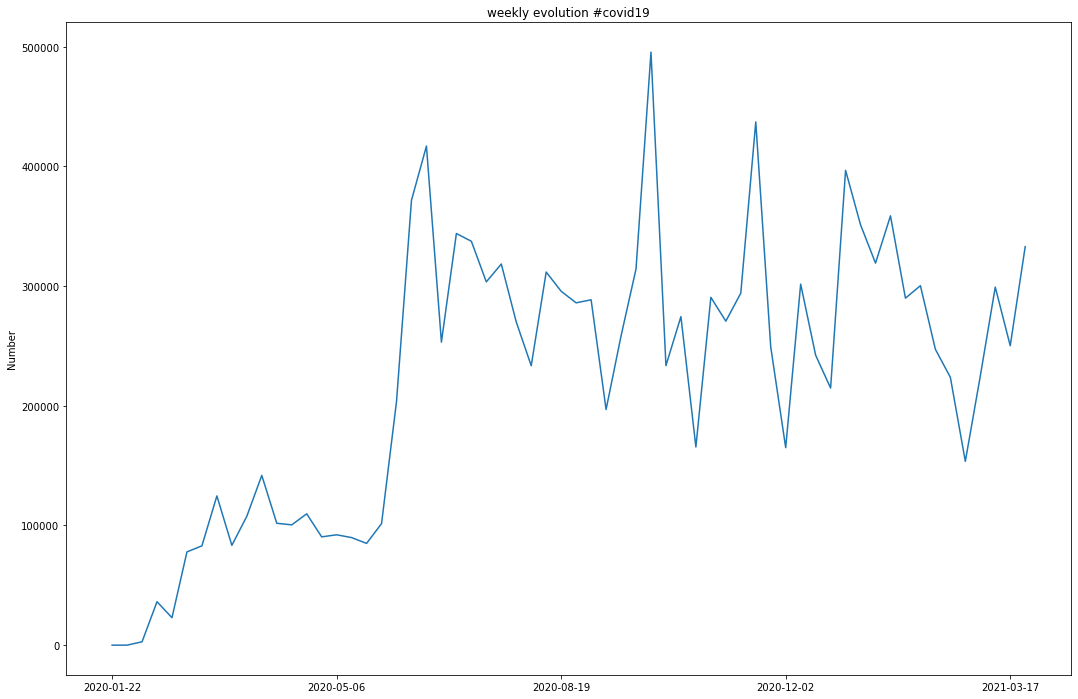

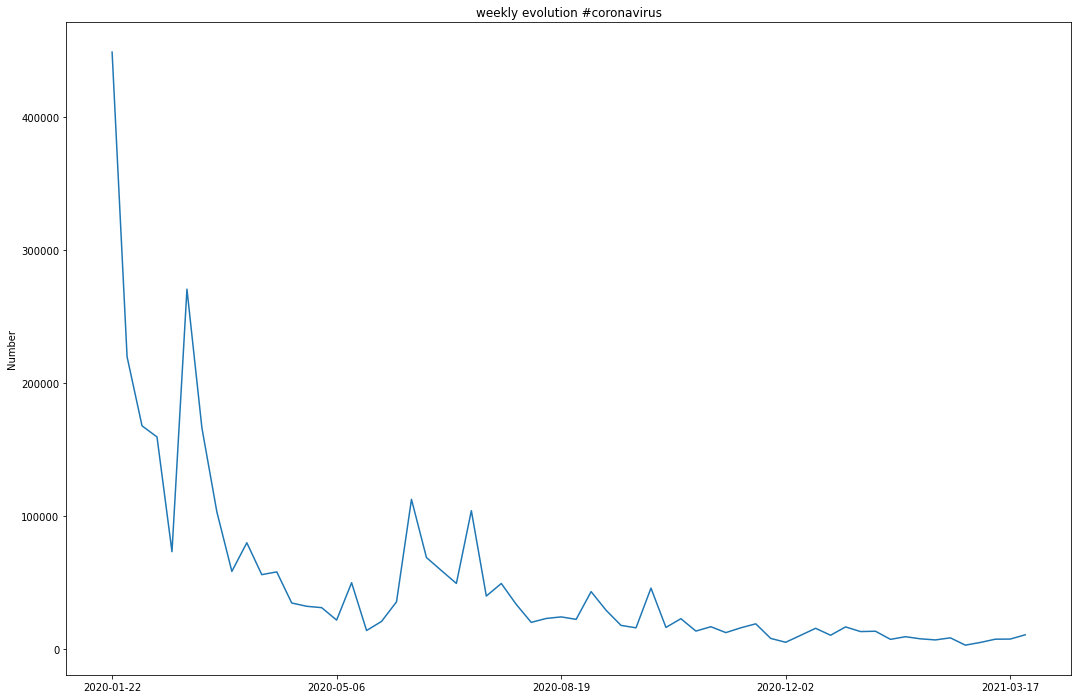

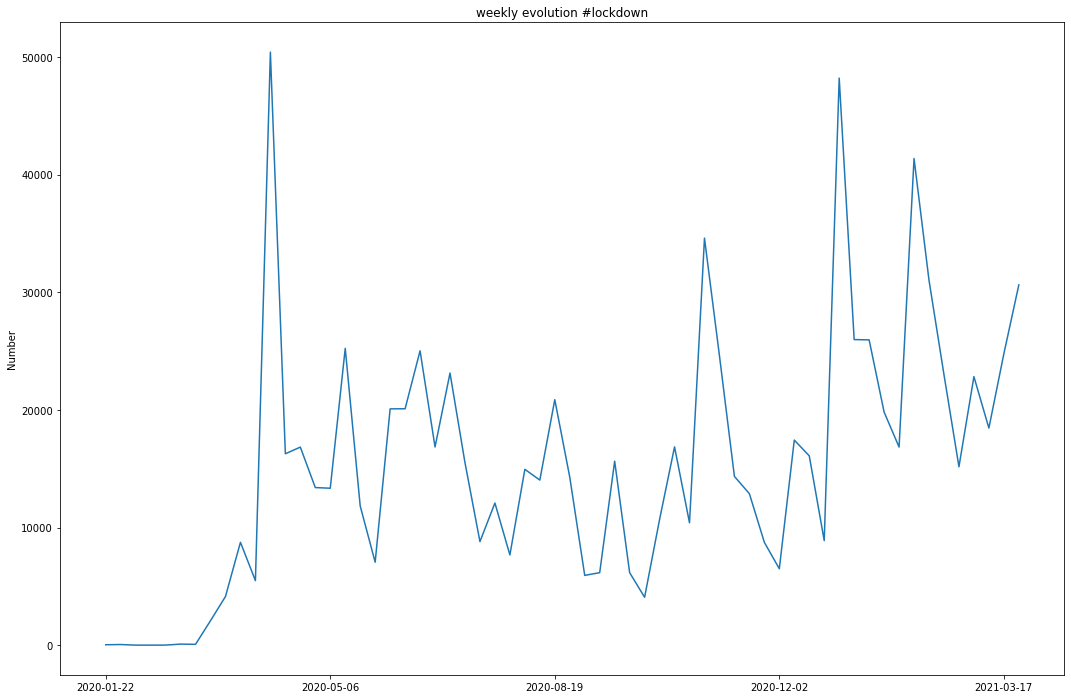

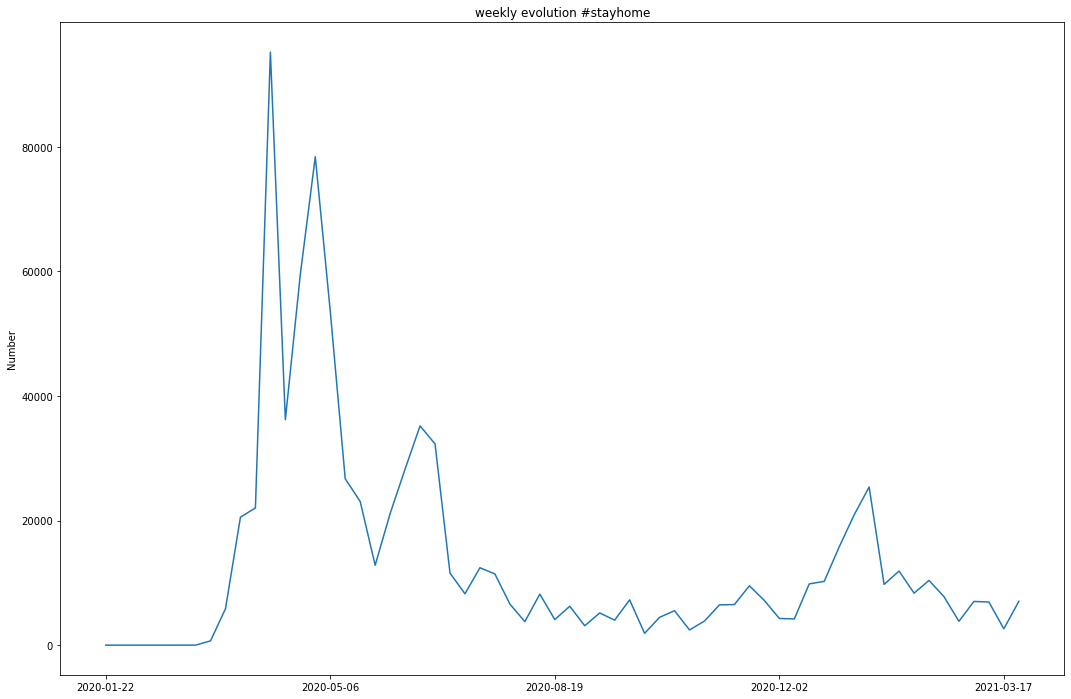

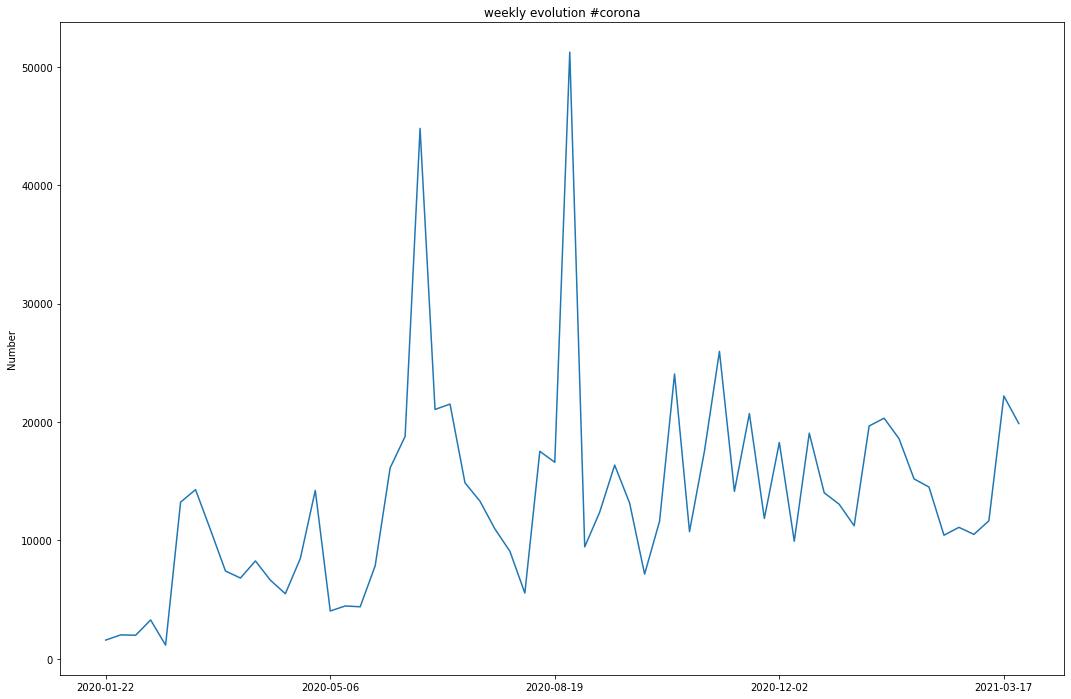

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
ax1=plt.subplot(111)
plt.title("weekly evolution #covid19")
ax1.set_ylabel('Number')
ax1.plot(week_list,list_Hashtag_first)
plt.xticks(range(0,62,15))
plt.savefig('C:\\Users\\huawei\\Desktop\\SNA的图\\5第五问\\点赞量最高的hashtag\\第一covid19.jpg')

import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
ax1=plt.subplot(111)
plt.title("weekly evolution #coronavirus")
ax1.set_ylabel('Number')
ax1.plot(week_list,list_Hashtag_second)
plt.xticks(range(0,62,15))
plt.savefig('C:\\Users\\huawei\\Desktop\\SNA的图\\5第五问\\点赞量最高的hashtag\\第二coronavirus.jpg')

import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
ax1=plt.subplot(111)
plt.title("weekly evolution #lockdown")
ax1.set_ylabel('Number')
ax1.plot(week_list,list_Hashtag_third)
plt.xticks(range(0,62,15))
plt.savefig('C:\\Users\\huawei\\Desktop\\SNA的图\\5第五问\\点赞量最高的hashtag\\第三lockdown.jpg')

import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
ax1=plt.subplot(111)
plt.title("weekly evolution #stayhome")
ax1.set_ylabel('Number')
ax1.plot(week_list,list_Hashtag_forth)
plt.xticks(range(0,62,15))
plt.savefig('C:\\Users\\huawei\\Desktop\\SNA的图\\5第五问\\点赞量最高的hashtag\\第四stayhome.jpg')

import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
ax1=plt.subplot(111)
plt.title("weekly evolution #corona")
ax1.set_ylabel('Number')
ax1.plot(week_list,list_Hashtag_fifth)
plt.xticks(range(0,62,15))
plt.savefig('C:\\Users\\huawei\\Desktop\\SNA的图\\5第五问\\点赞量最高的hashtag\\第五corona.jpg')

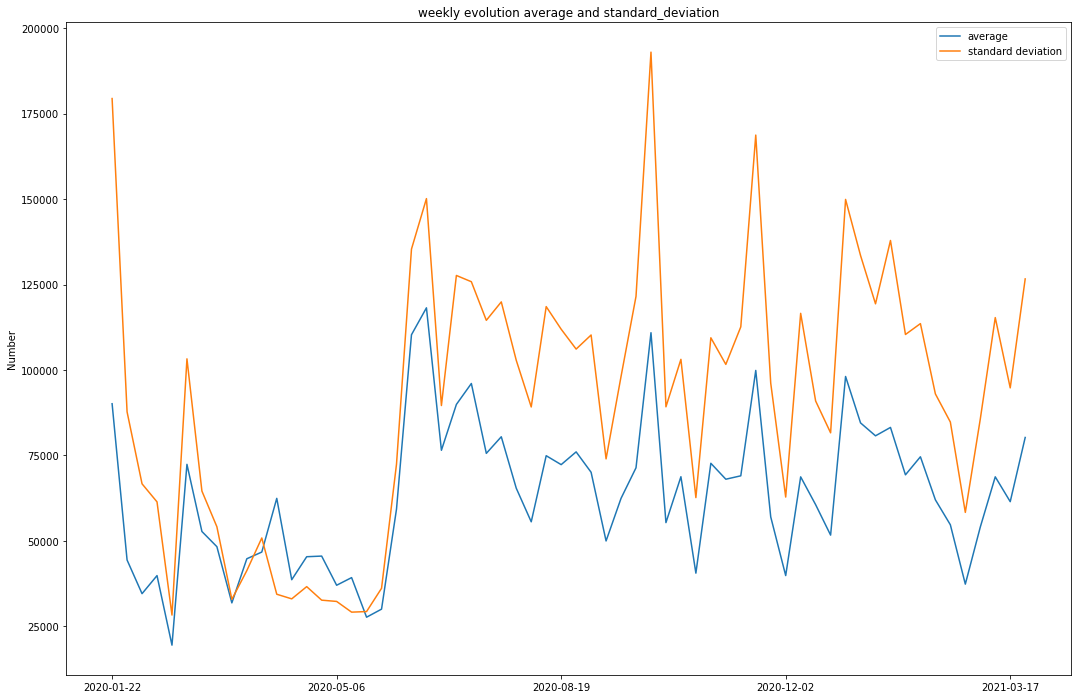

In [6]:
list_Hashtag_average = []
list_Hashtag_standarddeviation = []
import numpy as np
for i in range(62):
     #print(np.mean([list_Hashtag_first[i],list_Hashtag_second[i],list_Hashtag_third[i],list_Hashtag_forth[i],list_Hashtag_fifth[i]]))
        list_Hashtag_average.append(np.mean([list_Hashtag_first[i],list_Hashtag_second[i],list_Hashtag_third[i],list_Hashtag_forth[i],list_Hashtag_fifth[i]]))
        list_Hashtag_standarddeviation.append(np.std([list_Hashtag_first[i],list_Hashtag_second[i],list_Hashtag_third[i],list_Hashtag_forth[i],list_Hashtag_fifth[i]]))

import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
ax1=plt.subplot(111)
plt.title("weekly evolution average and standard_deviation")
ax1.set_ylabel('Number')
ax1.plot(week_list,list_Hashtag_average,label='average')
ax1.plot(week_list,list_Hashtag_standarddeviation,label='standard deviation')
plt.xticks(range(0,62,15))
plt.legend()
plt.savefig('C:\\Users\\huawei\\Desktop\\SNA的图\\5第五问\\点赞量最高的hashtag\\均值和标准差（每一周对五个hashtag求）.jpg')



date_num = pd.DataFrame(columns = ['week_date','average','standard deviation'])
date_num.loc[:,'week_date'] = week_list
date_num.loc[:,'average'] = list_Hashtag_average
date_num.loc[:,'standard deviation'] = list_Hashtag_standarddeviation
file = "C:\\Users\\huawei\\Desktop\\SNA的图\\5第五问\\点赞量最高的hashtag\\均值和标准差（每一周对五个hashtag求）.csv"
date_num.to_csv(file,index=False ,sep=',',encoding='iso-8859-1')


In [7]:
from scipy.stats import kurtosis
from scipy.stats import skew

statistic = pd.DataFrame(columns = ['average','standard deviation','kurtosis','skewness'])
statistic.loc["covid19",'average'] = np.mean(list_Hashtag_first)
statistic.loc["covid19",'standard deviation'] = np.std(list_Hashtag_first)
statistic.loc["covid19",'kurtosis'] = kurtosis(list_Hashtag_first)
statistic.loc["covid19",'skewness'] = skew(list_Hashtag_first)

statistic.loc["coronavirus",'average'] = np.mean(list_Hashtag_second)
statistic.loc["coronavirus",'standard deviation'] = np.std(list_Hashtag_second)
statistic.loc["coronavirus",'kurtosis'] = kurtosis(list_Hashtag_second)
statistic.loc["coronavirus",'skewness'] = skew(list_Hashtag_second)

statistic.loc["lockdown",'average'] = np.mean(list_Hashtag_third)
statistic.loc["lockdown",'standard deviation'] = np.std(list_Hashtag_third)
statistic.loc["lockdown",'kurtosis'] = kurtosis(list_Hashtag_third)
statistic.loc["lockdown",'skewness'] = skew(list_Hashtag_third)

statistic.loc["stayhome",'average'] = np.mean(list_Hashtag_forth)
statistic.loc["stayhome",'standard deviation'] = np.std(list_Hashtag_forth)
statistic.loc["stayhome",'kurtosis'] = kurtosis(list_Hashtag_forth)
statistic.loc["stayhome",'skewness'] = skew(list_Hashtag_forth)

statistic.loc["corona",'average'] = np.mean(list_Hashtag_fifth)
statistic.loc["corona",'standard deviation'] = np.std(list_Hashtag_fifth)
statistic.loc["corona",'kurtosis'] = kurtosis(list_Hashtag_fifth)
statistic.loc["corona",'skewness'] = skew(list_Hashtag_fifth)
file = "C:\\Users\\huawei\\Desktop\\SNA的图\\5第五问\\点赞量最高的hashtag\\均值_标准差_峰度_偏度(每一个hashtag对所有周).csv"
statistic.to_csv(file,index=True ,sep=',')
print(statistic)

             average standard deviation  kurtosis  skewness
covid19       223232             116221 -0.702819 -0.143512
coronavirus  50660.5            73626.4   12.8888   3.30596
lockdown     15362.2            11078.3   1.23447   0.96455
stayhome     13838.9              18070   7.48092   2.63261
corona       13591.5            8636.47   6.13376   1.92454
